## Step1: Import req Libraries

In [41]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step2 : Load the dataset

In [42]:
df = pd.read_csv('Mall_Customers.csv')
df. head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Step3: Data Preprocessing

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [44]:
# checking for misiing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [45]:
df.drop(columns=['CustomerID','Gender'], inplace=True)

## Step 4: EDA

In [46]:
import matplotlib.pyplot as plt

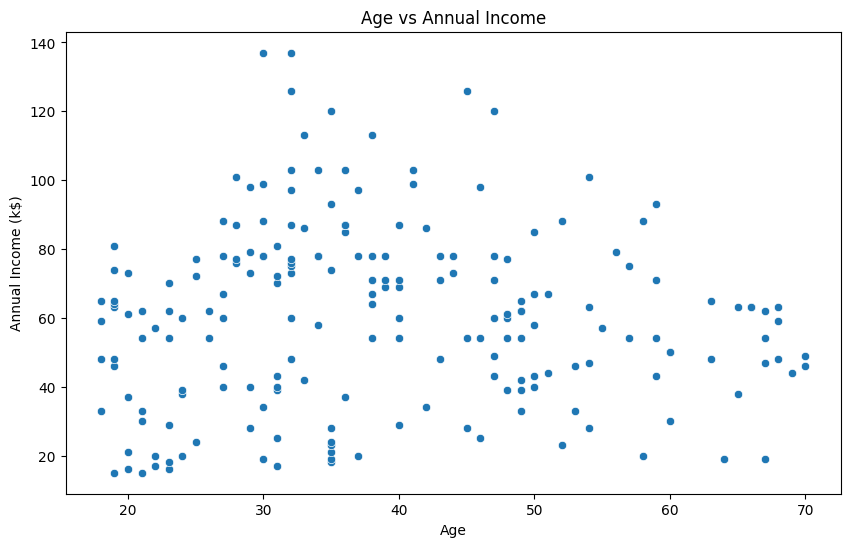

In [51]:
# display age and annual income scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x = "Age", y = "Annual Income (k$)", data = df)
plt.title("Age vs Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.show()

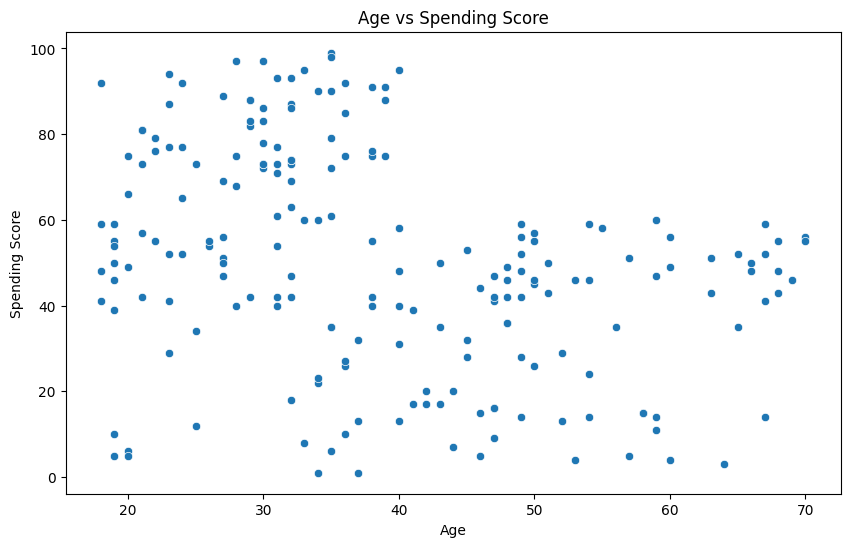

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(
    x="Age",
    y="Spending Score (1-100)",
    data=df
)

plt.title("Age vs Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()


## step5: Feature Engineering

In [53]:
# finding the skewness of the data
df.skew()

Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [56]:
print("Skewness of Age:", df['Age'].skew())
print("Skewness of Annual Income:", df['Annual Income (k$)'].skew())
print("Skewness of Spending Score:", df ["Spending Score (1-100)"].skew())

Skewness of Age: 0.48556885096681657
Skewness of Annual Income: 0.3218425498619055
Skewness of Spending Score: -0.047220201374263374


In [58]:
def skewness_name(skewness):
    if skewness > 0:
        return "Right Skewed"
    elif skewness < 0:
        return "Left Skewed"
    else:
        return "Normal"
print("Skewness of Age:", skewness_name(df['Age'].skew()))
print("Skewness of Annual Income:",skewness_name(df['Annual Income (k$)'].skew()))
print("Skewness of Spending Score:",skewness_name(df ["Spending Score (1-100)"].skew()))

Skewness of Age: Right Skewed
Skewness of Annual Income: Right Skewed
Skewness of Spending Score: Left Skewed


In [60]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns = df.columns)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


## Step6: Train k-mean model

In [63]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df)
df["Cluster"] = kmeans.labels_
df.head()


,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


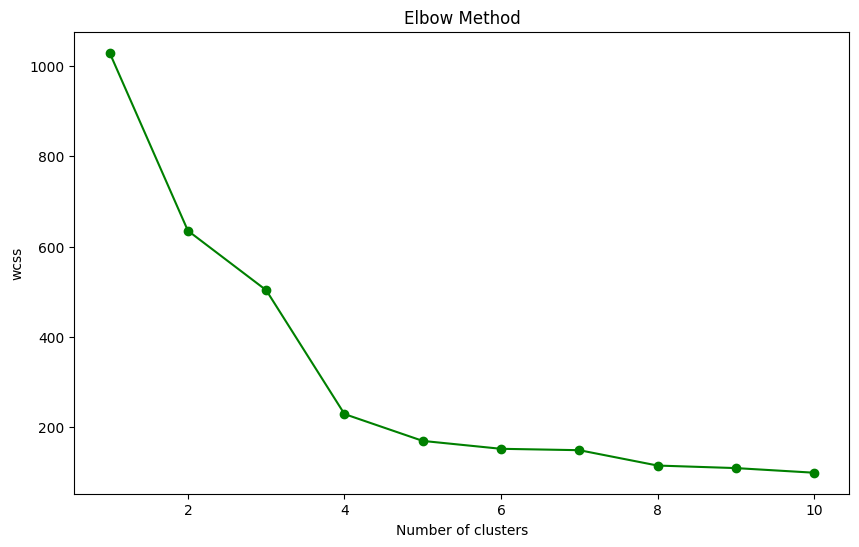

In [68]:
# check with elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', color='green')
plt.title("Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

Text(0, 0.5, 'Annual Income (k$)')

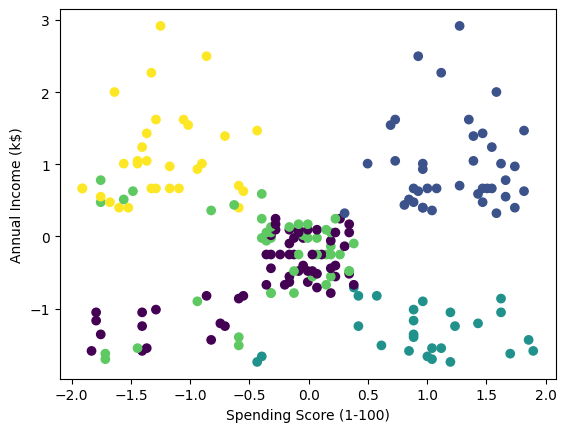

In [73]:
plt.scatter(df["Spending Score (1-100)"], df["Annual Income (k$)"], c = df["Cluster"])
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")

In [74]:
df.to_csv("Clustered_Mall_Customers.csv", index=False)

In [77]:
from sklearn.model_selection import train_test_split


In [80]:
x= df.drop(columns=["Cluster"],axis=0)
y= df["Cluster"]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42
)

In [83]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)


In [85]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[10  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  2 10  0]
 [ 0  0  0  0 10]]
Accuracy: 0.95


In [91]:
import joblib

In [92]:
joblib.dump(dt, "kmeans_model.pkl")

['kmeans_model.pkl']